In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import wordcloud as WordCloud

In [2]:
df = pd.read_csv("../datas/clean_data/clean_dataset.csv")

In [3]:
df.head()

,clean_text,sentiment
0,one reviewer mentioned watching oz episode you...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there family little boy jake think t...,negative
4,petter matteis love time money visually stunni...,positive


In [4]:
df["review_len"] = df["clean_text"].apply(lambda x: len(x.split()))

In [5]:
df.head()

,clean_text,sentiment,review_len
0,one reviewer mentioned watching oz episode you...,positive,167
1,wonderful little production filming technique ...,positive,84
2,thought wonderful way spend time hot summer we...,positive,85
3,basically there family little boy jake think t...,negative,66
4,petter matteis love time money visually stunni...,positive,125


In [6]:
df.loc[2047:2057]

,clean_text,sentiment,review_len
2047,awful effort go show happens use computer gene...,negative,73
2048,always loved muppets though childrens entertai...,positive,110
2049,stan laurel regarded putting pant philip first...,positive,159
2050,well cameo appearance jason miller looking eve...,negative,294
2051,im great writing review ill spout opinionsi lo...,positive,144
2052,ok anyone could honestly say movie great even ...,negative,91
2053,man movie sucked big time didnt even manage se...,negative,67
2054,loved long way round wasnt even aware race dak...,positive,47
2055,couldntfrom cutting dialogue super special eff...,positive,108
2056,heel well received beloved coming age film cla...,negative,328


In [7]:
avg_len = df["review_len"].mean()
max_len = df["review_len"].max()
min_len = df["review_len"].min()

print(f"Average length is :{avg_len}")
print(f"Maximum length is: {max_len}")
print(f"Minimum length is: {min_len}")

Average length is :118.60262
Maximum length is: 1420
Minimum length is: 3


C:\Users\h\AppData\Local\Temp\ipykernel_13232\2652026376.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='sentiment'>

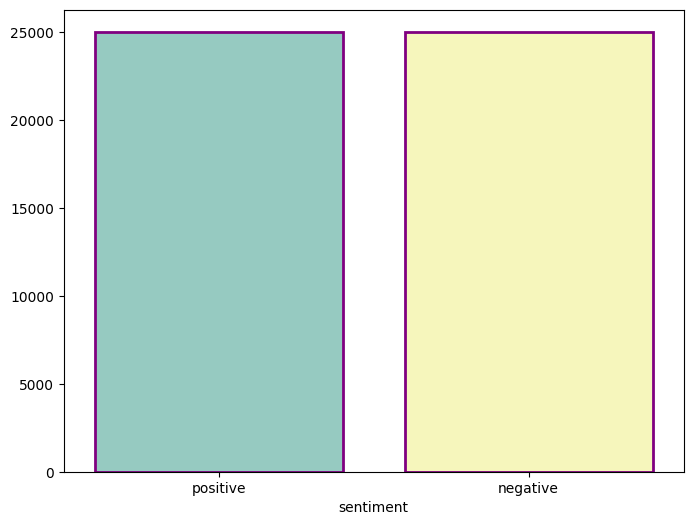

In [8]:
plt.figure(figsize=(8,6))
sns.barplot(
    x=df["sentiment"].value_counts().index,
    y=df["sentiment"].value_counts().values,
    palette="Set3",
    edgecolor = "purple",
    linewidth = 2
)

Text(0, 0.5, 'count')

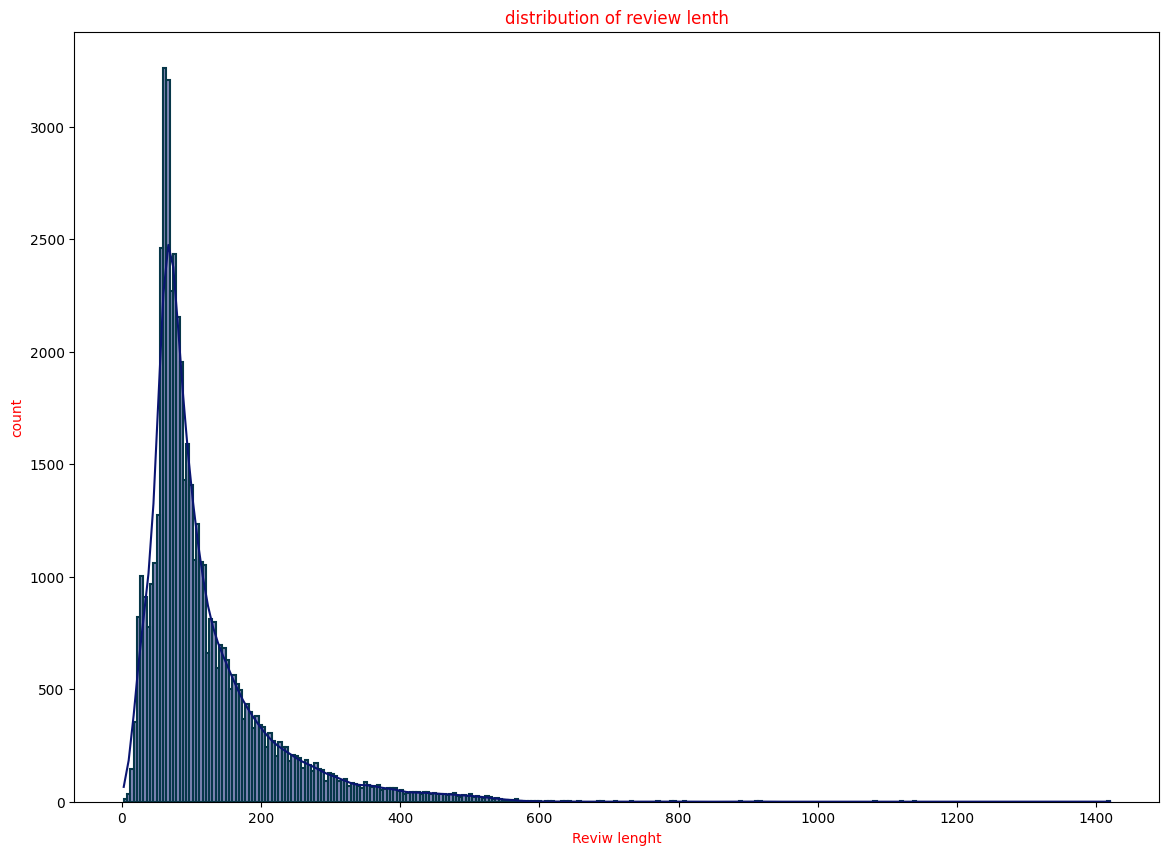

In [9]:
plt.figure(figsize=(14,10))
sns.histplot(
    data=df,
    x="review_len",
    bins=300,
    color="#0A1572",
    edgecolor="#073749",
    kde=True,
    linewidth =1.5,
)

plt.title("distribution of review lenth",color="red")
plt.xlabel("Reviw lenght",color="red")
plt.ylabel("count",color="red")

Text(0, 0.5, 'review length')

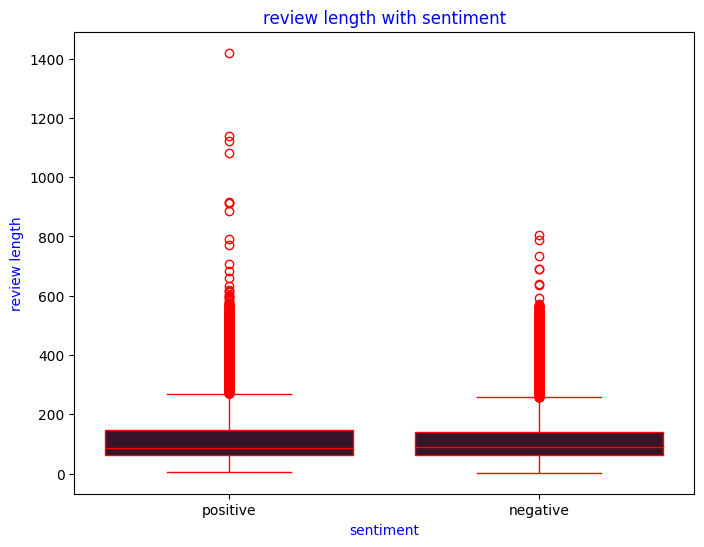

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x="sentiment",
    y="review_len",
    color="#3A1027",
    linecolor="red"
)

plt.title("review length with sentiment", color="blue")
plt.xlabel("sentiment", color="blue")
plt.ylabel("review length", color="blue")

In [11]:
all_text = " ".join(df["clean_text"])


In [12]:
all_word = all_text.split()

In [19]:
count_words = Counter(all_word)

In [21]:
core_words = count_words.most_common(40)
print(f"most core words are: {core_words}")

most core words are: [('movie', 99023), ('film', 89807), ('one', 52676), ('like', 39790), ('time', 29394), ('good', 28617), ('character', 27573), ('get', 24434), ('even', 24286), ('story', 24227), ('would', 24001), ('make', 23564), ('see', 23494), ('really', 22904), ('scene', 20706), ('much', 18896), ('well', 18629), ('people', 17979), ('great', 17803), ('bad', 17673), ('also', 17491), ('show', 16870), ('first', 16844), ('dont', 16635), ('way', 16535), ('thing', 16083), ('made', 15414), ('could', 15142), ('think', 15080), ('life', 14394), ('go', 14285), ('know', 14075), ('watch', 13686), ('love', 13383), ('many', 13263), ('seen', 13097), ('actor', 13011), ('two', 12935), ('plot', 12886), ('say', 12854)]


C:\Users\h\AppData\Local\Temp\ipykernel_13232\82750036.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


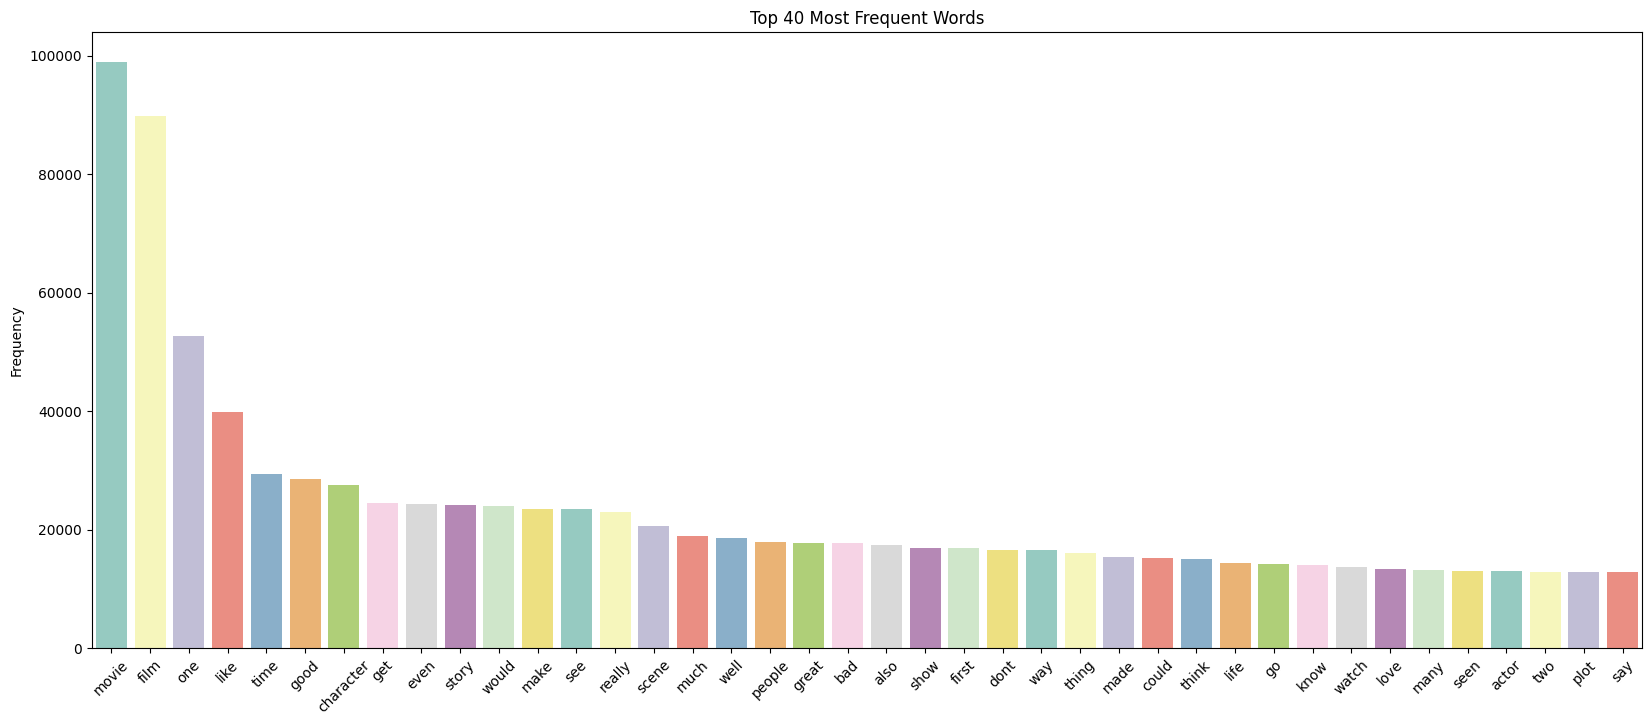

In [43]:
words,count = zip(*core_words)

plt.figure(figsize=(20,8))
sns.barplot(
    x=words,
    y=count,
    palette="Set3",
    linewidth = 2
)
plt.title("Top 40 Most Frequent Words")
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.show()

In [54]:
positive_word = " ".join(df[df["sentiment"]=="positive"]["clean_text"]).split()
pos_count = Counter(positive_word).most_common(20)

negative_word = " ".join(df[df["sentiment"]=="negative"]["clean_text"]).split()
neg_count = Counter(negative_word).most_common(20)

In [55]:
print(f"Core positive 20 words: {pos_count}")
print(f"Core negative 20 words: {neg_count}")

Core positive 20 words: [('film', 47894), ('movie', 43133), ('one', 26958), ('like', 17541), ('time', 15196), ('good', 14420), ('story', 13647), ('character', 13630), ('great', 12694), ('see', 12532), ('get', 11095), ('well', 11080), ('make', 10988), ('really', 10676), ('also', 10553), ('would', 10368), ('scene', 9693), ('show', 9411), ('even', 9365), ('life', 9137)]
Core negative 20 words: [('movie', 55890), ('film', 41913), ('one', 25718), ('like', 22249), ('even', 14921), ('time', 14198), ('good', 14197), ('bad', 14095), ('character', 13943), ('would', 13633), ('get', 13339), ('make', 12576), ('really', 12228), ('scene', 11013), ('see', 10962), ('story', 10580), ('dont', 10037), ('much', 9898), ('people', 9342), ('thing', 9230)]
